In [1]:
import pandas as pd
import matplotlib.pyplot as pl

C:\Users\rissu\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [87]:
df_main=pd.read_json('train-v2.0.json')

In [89]:
df_main.head()

version                                               data
0    v2.0  {'title': 'Beyoncé', 'paragraphs': [{'qas': [{...
1    v2.0  {'title': 'Frédéric_Chopin', 'paragraphs': [{'...
2    v2.0  {'title': 'Sino-Tibetan_relations_during_the_M...
3    v2.0  {'title': 'IPod', 'paragraphs': [{'qas': [{'qu...
4    v2.0  {'title': 'The_Legend_of_Zelda:_Twilight_Princ...

In [90]:
df_main.shape

(442, 2)

In [91]:
temp=df_main['data'][0]

In [92]:
par=temp['paragraphs']

In [93]:
ques=par[0]['qas']
ques[0]

{'question': 'When did Beyonce start becoming popular?',
 'id': '56be85543aeaaa14008c9063',
 'answers': [{'text': 'in the late 1990s', 'answer_start': 269}],
 'is_impossible': False}

In [96]:
questions=[]
answers=[]
answer_start=[]
is_answerable=[]

In [97]:
for sample in df_main['data']:
    par=sample['paragraphs']
    ques=par[0]['qas']
    for i in ques:
        questions.append(i['question'])
        if i['answers']:
            answers.append(i['answers'][0]['text'])
            answer_start.append(i['answers'][0]['answer_start'])
        else:
            answers.append('Null')
            answer_start.append('Null')
        is_answerable.append(i['is_impossible'])

In [98]:
len(questions),len(answers),len(answer_start),len(is_answerable)

(3860, 3860, 3860, 3860)

In [99]:
df=pd.DataFrame({'Question':questions,
                 'Answers':answers,
                 'Answer_start':answer_start,
                 'Is_answerable':is_answerable
                })

In [114]:
df.head(5)

Question              Answers  \
0           When did Beyonce start becoming popular?    in the late 1990s   
1  What areas did Beyonce compete in when she was...  singing and dancing   
2  When did Beyonce leave Destiny's Child and bec...                 2003   
3      In what city and state did Beyonce  grow up?        Houston, Texas   
4         In which decade did Beyonce become famous?           late 1990s   

  Answer_start  Is_answerable  
0          269          False  
1          207          False  
2          526          False  
3          166          False  
4          276          False

In [115]:
dev_data=pd.read_json('dev-v2.0.json')

In [117]:
questions=[]
answers=[]
answer_start=[]
is_answerable=[]
for sample in dev_data['data']:
    par=sample['paragraphs']
    ques=par[0]['qas']
    for i in ques:
        questions.append(i['question'])
        if i['answers']:
            answers.append(i['answers'][0]['text'])
            answer_start.append(i['answers'][0]['answer_start'])
        else:
            answers.append('Null')
            answer_start.append('Null')
        is_answerable.append(i['is_impossible'])
dev_df=pd.DataFrame({'Question':questions,
                 'Answers':answers,
                 'Answer_start':answer_start,
                 'Is_answerable':is_answerable
                })

In [119]:
dev_df

Question  \
0                 In what country is Normandy located?   
1                   When were the Normans in Normandy?   
2        From which countries did the Norse originate?   
3                            Who was the Norse leader?   
4    What century did the Normans first gain their ...   
..                                                 ...   
407  Who used the concept of antiquity in the study...   
408  Something that is considered a non fundamental...   
409  Most of the previous understandings about moti...   
410  Sir Galileo Galilei corrected the previous mis...   
411  Who formulated the laws of motion that were no...   

                         Answers Answer_start  Is_answerable  
0                         France          159          False  
1        10th and 11th centuries           94          False  
2    Denmark, Iceland and Norway          256          False  
3                          Rollo          308          False  
4                   10th century          671          False  
..                           ...          ...            ...  
407                         Null         Null           True  
408                         Null         Null           True  
409                         Null         Null           True  
410                         Null         Null           True  
411                         Null         Null           True  

[412 rows x 4 columns]

<IPython.core.display.Javascript object>

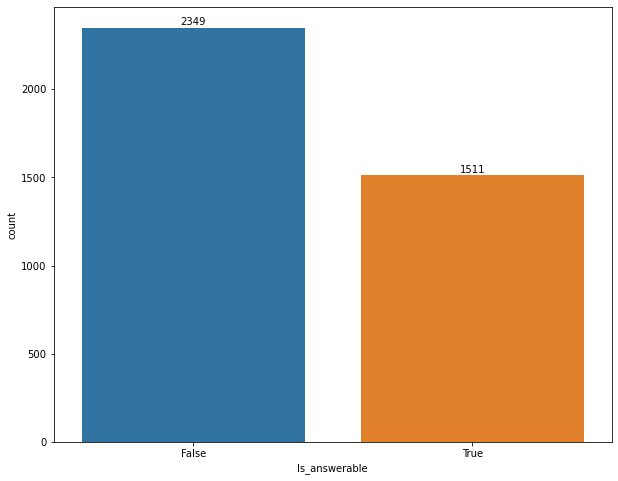

In [133]:
pl.figure(figsize=(10,8))

ax=sns.countplot(df['Is_answerable'])
rects=ax.patches

for rect in rects:
    height=rect.get_height()
    ax.text(x=rect.get_x()+rect.get_width()/2,y=height+5,s=height,ha='center',va='bottom')
pl.show()

<IPython.core.display.Javascript object>

-0.4 0.8
0.6 0.8


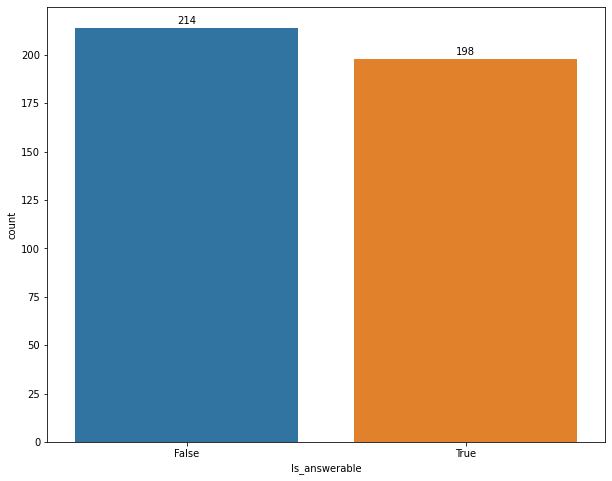

In [140]:
pl.figure(figsize=(10,8))

ax=sns.countplot(dev_df['Is_answerable'])
rects=ax.patches
for rect in rects:
    height=rect.get_height()
    print(rect.get_x(),rect.get_width())
    ax.text(x=rect.get_x()+rect.get_width()/2,y=height+1,s=height,ha='center',va='bottom')
pl.show()